In [1]:
import sys 
sys.path.append('../')
import matplotlib.pyplot as plt
import torch
import numpy as np
from src.green_net import GreenNet1D, GreenNet2D
from src.ops import grid1d_coords
import scipy
from scipy import integrate
import h5py
from tqdm import tqdm
from functools import partial

In [2]:
def cosine_kernel(x,y,h):    
    return 2/h *np.sin(h/2) * np.cos(x-y)

In [3]:
def logarithm_kernel(x,y,h):
    a = x-y+h/2
    b = x-y-h/2
    k = (a*np.log(a.abs())-1) - (b*np.log(b.abs())-1)
    return k/h

In [4]:
def poisson_green(x,y,h):
    return ((x+y-np.abs(y-x))/2 - x*y)/h

In [17]:
def poisson_kernel(x, y, h):
    a = -x*(y-1) * (x<(y-h/2))
    b = -y*(x-1) * (x>(y+h/2))
    c = ( (1-x)*( -0.5*(y-h/2)**2 + x**2/2) + (x * (h/2+y-x))-( x * (0.5*(h/2+y)**2 - x**2/2)))/h * ( (x>=(y-h/2)) & (x<=(y+h/2)) )
    return a+b+c

In [18]:
data_path = '../dataset/f1d_8193_3.00e-01.mat'

try:
    raw_data = scipy.io.loadmat(data_path)
    F = raw_data['F']
except:
    raw_data = h5py.File(data_path)
    F = raw_data['F'][()]
    F = np.transpose(F, axes=range(len(F.shape) - 1, -1, -1))

In [19]:
nh = 2**13+1
h = np.pi/(nh-1)
xh = torch.linspace(0,np.pi,nh)
x_i = torch.cartesian_prod(xh, xh)
K = cosine_kernel(x_i[:,0], x_i[:,1], h).reshape(nh,nh)
U = h * K @ F

f = np.sin(xh)**2
u = h * K @ f.reshape(-1,1)
u_gt = 4/3 * np.sin(xh)

print((u.reshape(-1)-u_gt).abs().max())

tensor(7.1526e-07)


In [20]:
nh = 2**13+1
h = 2/(nh-1)
xh = torch.linspace(-1,1,nh)
x_i = torch.cartesian_prod(xh, xh)
K = logarithm_kernel(x_i[:,0], x_i[:,1], h).reshape(nh,nh)
U = h * K @ F

# f = 1-xh**2
# u = h * K @ f.reshape(-1,1)
# u_gt = 4/3 * np.sin(xh)

# print((u.reshape(-1)-u_gt).abs().max())

In [49]:
nh = 2**13+1
h = 2/(nh-1)
xh = torch.linspace(0,1,nh)
x_i = torch.cartesian_prod(xh, xh)
K = poisson_kernel(x_i[:,0], x_i[:,1], h).reshape(nh,nh)
# U = h * K @ F

In [51]:
x = x_i[:,0]
y = x_i[:,1]
K_gt = (x+y - (y-x).abs())/2 - x*y

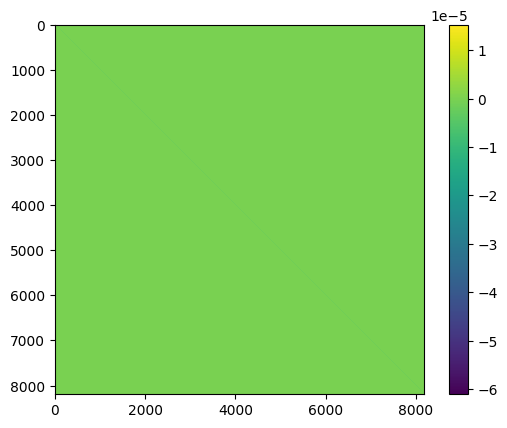

In [55]:
plt.imshow(K - K_gt.reshape(nh, nh))
plt.colorbar()

torch.Size([8193, 8193])

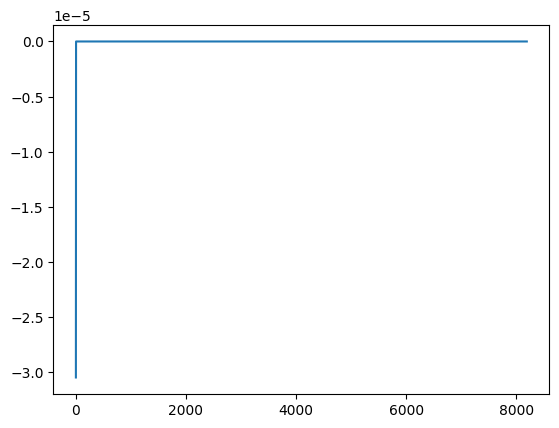

In [37]:
plt.plot(K[0])

In [45]:
K.max()

tensor(0.2500)

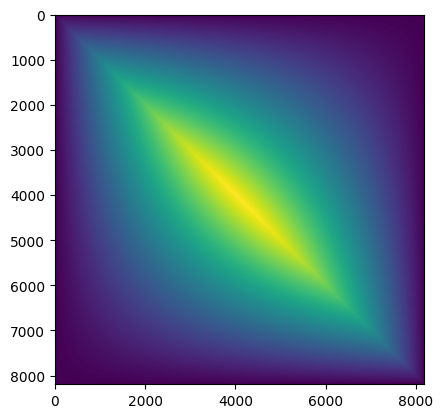

In [22]:
plt.imshow(K)

In [13]:
x = x_i[:,0]
y = x_i[:,1]
kij = []
for xi in tqdm(x.tolist(), total=len(x)):
    for yj in tqdm(y.tolist(), total=len(y)):
        p = lambda y: ((xi+y-np.abs(y-xi))/2 - xi*y)/h
        kij.append(integrate.quad(p, yj-h/2, yj+h/2)[0])
    break

  0%|          | 0/67125249 [00:13<?, ?it/s]


KeyboardInterrupt: 

In [11]:
for xi in x.tolist():
    print(xi)
    break 

-1.0


In [13]:
for xi in x:
    for yj in y:
        break 
    break